### DATA DESCRIPTION

The dataset is fairly simple and contains various features regarding precipitation.
 * PRCP = Precipitation (tenths of mm)
 * TMAX = Maximum temperature (tenths of degrees C)
 * TMIN = Minimum temperature (tenths of degrees C)
 * PGTM = Peak gust time (hours and minutes, i.e., HHMM)
 * AWND= Average daily wind speed (tenths of meters per second)
 * TAVG = Average temperature (tenths of degrees C)
 * WDFx = Direction of fastest x-minute wind (degrees)
 * WSFx= Fastest x-minute wind speed (tenths of meters per second)
 * WT = Weather Type

### IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\Users\verma\Documents\Processing\Wids project\dataset.csv")

In [4]:
data['PRCP'].unique()

array([0.  , 0.01, 1.61, 0.8 , 0.3 , 0.43, 0.58, 0.21, 0.64, 0.38, 0.52,
       0.03, 0.02, 0.06, 0.14, 0.04, 0.05, 0.34, 0.09, 0.55, 0.2 , 0.13,
       1.33, 0.5 , 0.27, 1.41, 0.39, 0.08, 0.07, 0.77, 1.13, 0.98, 1.51,
       2.67, 0.33, 0.23, 0.88, 2.01, 0.1 , 0.32, 1.45, 0.51, 0.17, 0.65,
       0.56, 0.42, 0.15, 1.02, 1.91, 0.74, 1.  , 0.99, 0.93, 1.73, 0.46,
       0.24, 0.26, 0.12, 2.12, 0.18, 0.89, 1.25, 0.48, 0.63, 0.49, 1.12,
       0.92, 1.07, 0.68, 0.25, 1.3 , 1.1 , 0.82, 0.75, 0.16, 0.11, 1.81])

**Precipitation column in the dataframe will be our target feature in this model. We have to replace all values greater than 0 as 1 (representing precipitation will occur), and values that are equal to 0 representing precipitation will not occur.**

In [5]:
data['PRCP'].value_counts()

0.00    1660
0.01      20
0.03      12
0.02       9
0.04       8
        ... 
0.64       1
1.02       1
1.91       1
0.74       1
1.81       1
Name: PRCP, Length: 77, dtype: int64

In [6]:
for i in range(len(data['PRCP'])):
    if data['PRCP'].iloc[i] > 0:
        data['PRCP'].iloc[i] = 1
        

C:\Users\verma\AppData\Local\Temp\ipykernel_39824\4257058929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PRCP'].iloc[i] = 1


In [7]:
data['PRCP'].value_counts()

0.0    1660
1.0     167
Name: PRCP, dtype: int64

### ANALYSIS THE DATASET AND CLEAN DATA

In [8]:
data.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.0,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.0,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.0,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,1.0,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.0,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [9]:
data.tail()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-27,1.12,NaN,1.0,NaN,66,55,270.0,260.0,8.9,18.1,1.0,NaN,1.0
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-28,4.70,NaN,1.0,NaN,56,47,90.0,260.0,14.1,21.0,1.0,NaN,NaN
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-29,1.57,NaN,0.0,NaN,65,42,340.0,360.0,10.1,18.1,NaN,NaN,NaN
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-30,0.45,NaN,0.0,NaN,69,44,260.0,260.0,6.9,12.1,NaN,NaN,NaN
1826,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-31,1.57,NaN,0.0,NaN,70,43,350.0,350.0,12.1,19.9,NaN,NaN,NaN


**COMMENT :-** There are NaN value presaent in data that need to deal ( remove or replace )

In [10]:
data.shape

(1827, 16)

In [11]:
data.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          4
PGTM       1765
PRCP          0
TAVG       1827
TMAX          0
TMIN          0
WDF2          5
WDF5         18
WSF2          4
WSF5         18
WT01       1276
WT02       1788
WT08        966
dtype: int64

In [12]:
print("No of nan values in 'PGTM' is: ", data['PGTM'].isnull().sum())
print('But the data shape is ', data.shape)


No of nan values in 'PGTM' is:  1765
But the data shape is  (1827, 16)


**COMMENT :-** Columns 'PGTM', 'TAVG', 'WT01', 'WT02' and 'WT08' has large number of null values and it's better to remove them.

In [13]:
data.drop(['PGTM', 'TAVG', 'WT01','WT02','WT08'], inplace = True, axis = 1)

In [14]:
data.isnull().sum()

STATION     0
NAME        0
DATE        0
AWND        4
PRCP        0
TMAX        0
TMIN        0
WDF2        5
WDF5       18
WSF2        4
WSF5       18
dtype: int64

In [15]:
data.describe()

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
count,1823.000000,1827.000000,1827.000000,1827.000000,1822.000000,1809.000000,1823.000000,1809.000000
mean,1.675710,0.091407,76.498632,58.120416,254.143798,256.428966,9.062095,14.721669
std,0.909434,0.288265,9.133929,7.223756,54.756284,55.571902,2.016827,3.622257
min,0.000000,0.000000,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000
25%,1.120000,0.000000,70.000000,53.000000,260.000000,270.000000,8.100000,12.100000
50%,1.570000,0.000000,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000
75%,2.010000,0.000000,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000
max,8.050000,1.000000,111.000000,79.000000,360.000000,360.000000,21.000000,34.000000


**COMMENT :-** 
  * Column AWND has high maximum value compare to 3rd quartile. It may have outliers.
  * Column PRCP has only max value which mean maximum value are 0 which show class imbalance

**NOW LOOK AT EACH COLUMNS**

In [16]:
data.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2',
       'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

In [17]:
data.nunique()

STATION       1
NAME          1
DATE       1827
AWND         32
PRCP          2
TMAX         52
TMIN         42
WDF2         29
WDF5         30
WSF2         17
WSF5         26
dtype: int64

In [18]:
# Column 1
data['STATION'].unique()

array(['USW00093134'], dtype=object)

**COMMENT 1:-** 
     Column 'STATION' has only one Station name so it's better to drop it.

In [19]:
# Column 2
data['NAME'].unique()

array(['LOS ANGELES DOWNTOWN USC, CA US'], dtype=object)

**COMMENT 2:-** . Column 'NAME' has only one unique value so it's better to drop it.

In [20]:
# Column 3
data['DATE'].unique()

array(['2016-01-01', '2016-01-02', '2016-01-03', ..., '2020-12-29',
       '2020-12-30', '2020-12-31'], dtype=object)

**Drop the columns which are not neccessary like STATION, NAME, DATE**

In [21]:
# drop the columns
data.drop(['STATION', 'NAME', 'DATE'], axis = 1, inplace = True)

In [22]:
# Continue to watch each columns 
# Column 4
data['AWND'].unique()

array([2.46, 2.01, 0.67, 1.34, 2.91, 1.79, 2.24, 1.12, 0.22, 1.57, 0.89,
       4.47, 6.04, 0.45, 4.7 , 3.36, 2.68, 3.58, 3.13, 5.59, 6.71, 4.25,
        nan, 3.8 , 4.03, 5.14, 4.92, 0.  , 7.16, 8.05, 5.82, 5.37, 6.49])

In [23]:
data.AWND.isnull().sum()

4

In [24]:
data['AWND']

0       2.46
1       2.01
2       0.67
3       1.34
4       2.46
        ... 
1822    1.12
1823    4.70
1824    1.57
1825    0.45
1826    1.57
Name: AWND, Length: 1827, dtype: float64

**COMMENT 3:-**  Column 'AWND' has only 4 nan value so we replace it by mode values.

In [25]:
# Column 5
print(data['TMAX'].unique())
print('Number of nan values in column: ', data['TMAX'].isnull().sum() )

[ 64  65  62  69  59  58  60  70  66  67  68  63  77  71  73  74  72  76
  84  88  89  87  85  75  79  90  78  83  81  61  80  82  96 101  86  92
  95  97  91 104  93  56  94  98 102 100  99 108  57  52 111 103]
Number of nan values in column:  0


In [26]:
# Column 6
print(data['TMIN'].unique())
print('Number of nan values in column: ', data['TMIN'].isnull().sum() )

[43 47 44 55 49 46 45 51 50 54 52 41 53 56 61 59 48 58 57 60 62 63 66 71
 67 64 65 68 69 70 42 40 72 74 76 78 73 79 75 39 38 77]
Number of nan values in column:  0


In [27]:
# Column 7
print(data['WDF2'].unique())
print('Number of nan values in column: ', data['WDF2'].isnull().sum() )

[ 10. 270. 150. 140.  80.  20. 280.  90. 260. 350. 100. 320. 310.  60.
 330. 290. 130. 170. 340.  70. 110.  nan 120.  50. 160. 300.  30. 360.
 250.  40.]
Number of nan values in column:  5


**COMMENT 4:-**  Column "WDF2" has 5 nan values so it's better to replace by mode value

In [28]:
# Column 8
print(data['WDF5'].unique())
print('Number of nan value in column: ', data['WDF5'].isnull().sum() )

[ 30. 150. 280. 140. 290.  10. 340. 100. 270. 120. 360. 110. 260. 250.
  90. 180. 310. 170. 330.  nan 350.  20. 160.  70.  40.  50.  80. 130.
 300.  60. 320.]
Number of nan value in column:  18


**COMMENT 5:-**  Column "WDF5" has 18 nan values so it's better to replace by mode value.

In [29]:
# Column 9
print(data['WSF2'].unique())
print('Number of nan value in column: ', data['WSF2'].isnull().sum() )

[ 8.1  6.  10.1 12.1  6.9  8.9 16.1 14.1 13.  17.  15.   4.9 18.1  2.9
  nan  4.  19.9 21. ]
Number of nan value in column:  4


**COMMENT 6:-**  Column "WSF2" has 4 nan values so it's better to replace by mode value.

In [30]:
# Column 10
print(data['WSF5'].unique())


[11.   8.9 14.1 16.1 17.  18.1 10.1 12.1 13.  15.  32.  34.  25.9 19.
 21.  28.  23.  29.1 25.1  nan 19.9 27.1  8.1 21.9 23.9  6.  30. ]


In [31]:
print('Number of nan value in column: ', data['WSF5'].isnull().sum() )

Number of nan value in column:  18


**COMMENT 7:-** Column 'WSF5' has 18 null value, we replace it by mode value.

In [32]:
data.isnull().sum()

AWND     4
PRCP     0
TMAX     0
TMIN     0
WDF2     5
WDF5    18
WSF2     4
WSF5    18
dtype: int64

**Filling column which has low nan value by Mode filling**

In [33]:
data.isnull().sum()

AWND     4
PRCP     0
TMAX     0
TMIN     0
WDF2     5
WDF5    18
WSF2     4
WSF5    18
dtype: int64

In [34]:
for i in data.columns:
    mode = data[i].mode()[0]
    for j in range(len(data[i])):
        if data[i].isnull().iloc[j] == True :
            data[i].fillna(mode , inplace = True)

In [35]:
data.isnull().sum()

AWND    0
PRCP    0
TMAX    0
TMIN    0
WDF2    0
WDF5    0
WSF2    0
WSF5    0
dtype: int64

In [36]:
data.head()

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2.46,0.0,64,43,10.0,30.0,8.1,11.0
1,2.01,0.0,65,47,270.0,30.0,6.0,8.9
2,0.67,0.0,62,44,150.0,150.0,10.1,14.1
3,1.34,1.0,69,55,270.0,280.0,8.1,14.1
4,2.46,1.0,59,49,140.0,140.0,10.1,16.1


### EDA OF DATA

In [37]:
# sns.histplot(data['TMAX'], kde = True)
# plt.show()

### HANDLING CLASS IMBALANCE

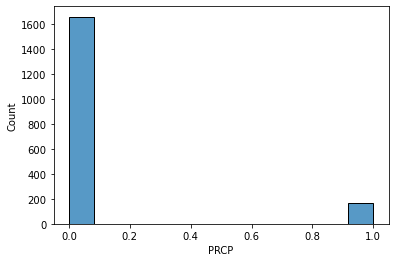

In [38]:
sns.histplot(data['PRCP'])
plt.show()

**Here 0 has more number of times compare to 1 so it will create class imbalance**

In [39]:
data['PRCP'].value_counts()

0.0    1660
1.0     167
Name: PRCP, dtype: int64

In [40]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [41]:
x = data.drop('PRCP', axis = 1)
y = data[['PRCP']]

In [42]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % y_res.value_counts())

Resampled dataset shape PRCP
0.0     1660
1.0     1660
dtype: int64


In [43]:
x_res

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2.460000,64,43,10.000000,30.0,8.100000,11.000000
1,2.010000,65,47,270.000000,30.0,6.000000,8.900000
2,0.670000,62,44,150.000000,150.0,10.100000,14.100000
3,1.340000,69,55,270.000000,280.0,8.100000,14.100000
4,2.460000,59,49,140.000000,140.0,10.100000,16.100000
...,...,...,...,...,...,...,...
3315,1.731518,64,54,260.000000,260.0,9.008003,16.591399
3316,2.010000,66,55,270.000000,270.0,8.100000,13.476548
3317,2.554170,60,53,100.000000,100.0,13.537788,20.030185
3318,1.870891,64,53,260.000000,260.0,9.071179,16.479390


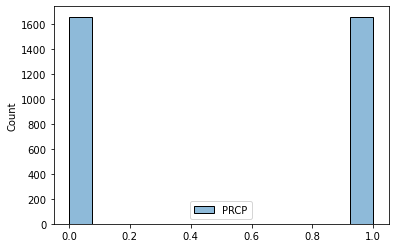

In [44]:
sns.histplot(y_res)
plt.show()

In [45]:
x_res.shape

(3320, 7)

In [46]:
x_res.head()

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2.46,64,43,10.0,30.0,8.1,11.0
1,2.01,65,47,270.0,30.0,6.0,8.9
2,0.67,62,44,150.0,150.0,10.1,14.1
3,1.34,69,55,270.0,280.0,8.1,14.1
4,2.46,59,49,140.0,140.0,10.1,16.1


### EDA OF DATA

**Column AWND= Average daily wind speed (tenths of meters per second)**

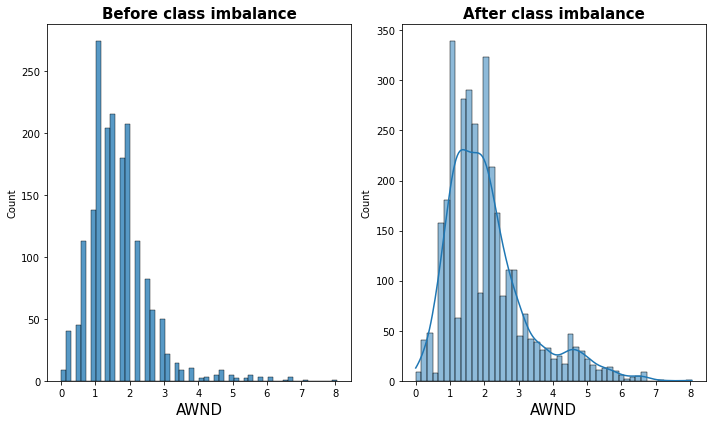

In [47]:
fig,ax = plt.subplots(1,2, figsize = (10,6))

# before class imbalance\
sns.histplot(data['AWND'], ax = ax[0])
ax[0].set_title('Before class imbalance', fontweight = 'bold', size = 15)
ax[0].set_xlabel('AWND',fontsize = 15)

sns.histplot(x_res['AWND'], kde = True, ax = ax[1])
ax[1].set_title('After class imbalance', fontweight = 'bold',size =15)
ax[1].set_xlabel('AWND',fontsize = 15)

plt.tight_layout() 
plt.show()

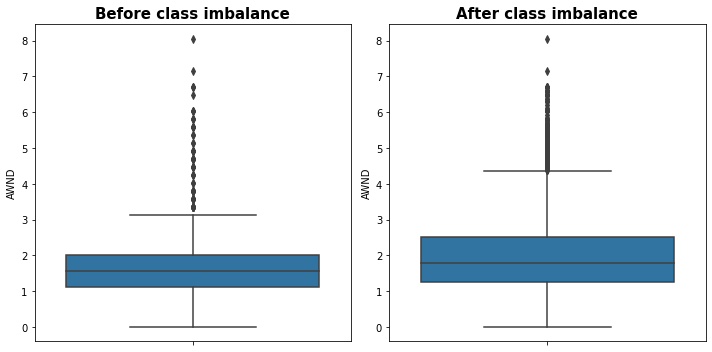

In [48]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'AWND')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'AWND')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

In [49]:
Q1 = np.quantile(x_res['AWND'], 0.25)
Q3 = np.quantile(x_res['AWND'], 0.75)
IQR = Q3 -Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
x_res[x_res['AWND'] > upper]

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
30,4.470000,59,50,270.000000,280.000000,16.100000,32.000000
31,6.040000,58,43,320.000000,340.000000,16.100000,32.000000
65,4.700000,67,54,270.000000,270.000000,16.100000,34.000000
81,5.590000,71,53,310.000000,310.000000,16.100000,25.900000
105,6.710000,81,59,330.000000,330.000000,17.000000,29.100000
...,...,...,...,...,...,...,...
3303,4.435900,60,51,100.000000,100.000000,10.100000,16.049104
3310,5.529409,60,54,80.000000,86.771206,11.682109,17.227868
3311,5.492384,57,50,100.000000,90.000000,14.576883,24.304747
3313,5.152036,58,51,107.821074,110.000000,12.368112,21.268112


In [50]:
x_res[x_res['AWND'] > 6]

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
31,6.040000,58,43,320.000000,340.000000,16.100000,32.000000
105,6.710000,81,59,330.000000,330.000000,17.000000,29.100000
387,6.710000,56,51,100.000000,90.000000,17.000000,28.000000
413,7.160000,61,53,130.000000,140.000000,17.000000,30.000000
482,6.040000,85,60,330.000000,330.000000,17.000000,34.000000
483,8.050000,85,69,320.000000,330.000000,18.100000,32.000000
832,6.710000,70,55,350.000000,300.000000,15.000000,28.000000
1195,6.040000,77,59,270.000000,280.000000,14.100000,23.000000
1452,6.490000,60,51,90.000000,80.000000,19.900000,32.000000
1870,6.553513,58,51,92.886937,82.886937,19.062788,30.845225


<p> 
Remove the outlier above 6 because it is not in much quantity and it will not give much information so it's better to remove it.
</p>

In [51]:
x_res = x_res[x_res['AWND'] < 6]

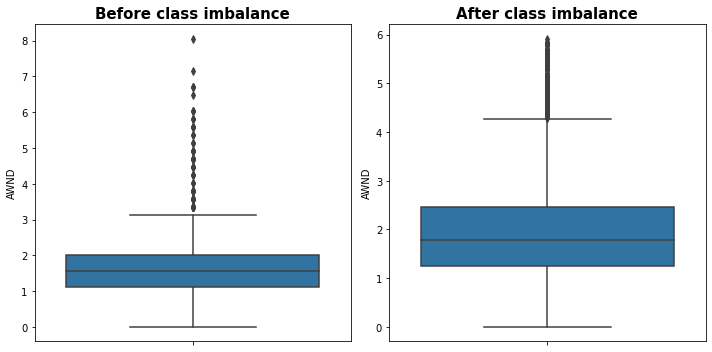

In [52]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'AWND')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'AWND')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

**Column TMAX = Maximum temperature (tenths of degrees C)**

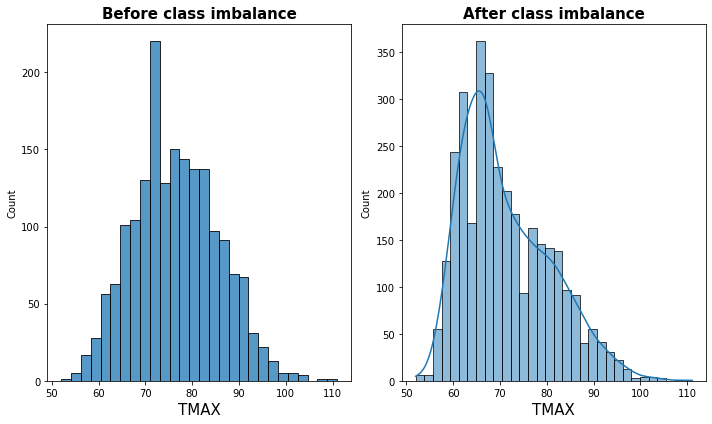

In [53]:
fig,ax = plt.subplots(1,2, figsize = (10,6))


# before class imbalance\
sns.histplot(data['TMAX'], ax = ax[0])
ax[0].set_title('Before class imbalance', fontweight = 'bold', size = 15)
ax[0].set_xlabel('TMAX',fontsize = 15)

sns.histplot(x_res['TMAX'], kde = True, ax = ax[1])
ax[1].set_title('After class imbalance', fontweight = 'bold',size =15)
ax[1].set_xlabel('TMAX',fontsize = 15)

plt.tight_layout() 
plt.show()


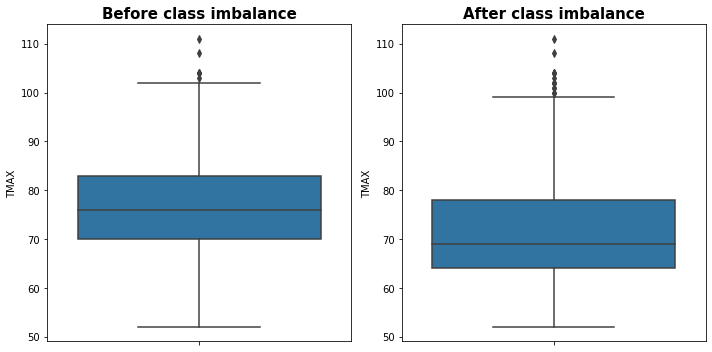

In [54]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'TMAX')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'TMAX')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

In [55]:
Q1 = np.quantile(x_res['TMAX'], 0.25)
Q3 = np.quantile(x_res['TMAX'], 0.75)
IQR = Q3 -Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
x_res[x_res['TMAX'] > upper]

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
171,2.01,101,71,280.0,260.0,8.9,14.1
269,2.46,104,69,270.0,280.0,12.1,17.0
608,2.01,102,74,140.0,150.0,8.1,13.0
609,2.01,102,76,270.0,260.0,10.1,17.0
610,1.34,100,78,170.0,140.0,6.9,11.0
661,1.12,102,67,270.0,270.0,8.1,11.0
662,0.45,104,68,270.0,270.0,6.9,11.0
663,0.89,100,69,280.0,260.0,8.1,13.0
917,2.46,108,69,270.0,270.0,10.1,18.1
918,1.79,104,79,140.0,140.0,8.9,15.0


<p> 
Remove the outlier it is not in much quantity and it will not give much information so it's better to remove it.
</p>

In [56]:
x_res = x_res[x_res['TMAX'] <upper]

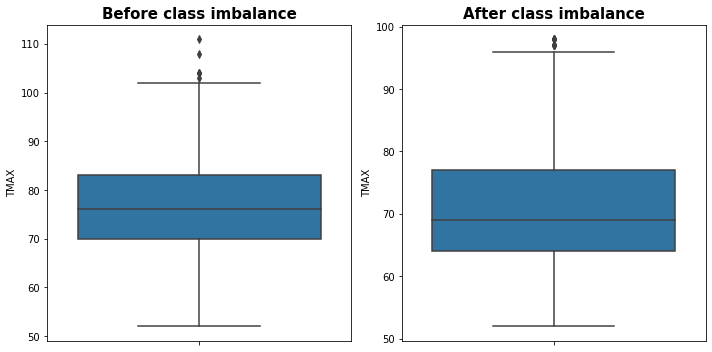

In [57]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'TMAX')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'TMAX')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

**Column TMIN = Minimum temperature (tenths of degrees C)**

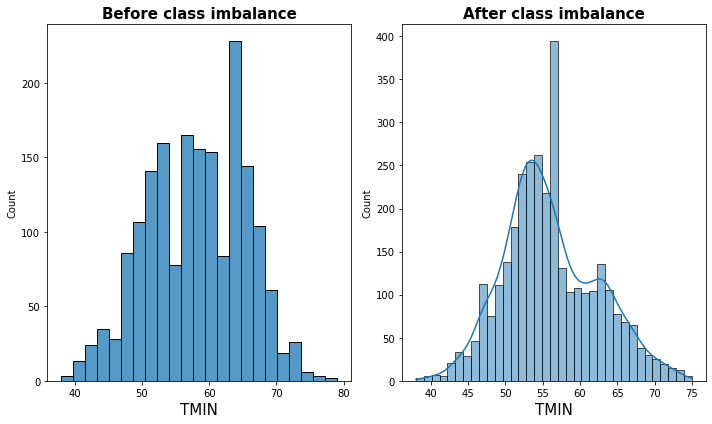

In [58]:
fig,ax = plt.subplots(1,2, figsize = (10,6))


# before class imbalance\
sns.histplot(data['TMIN'], ax = ax[0])
ax[0].set_title('Before class imbalance', fontweight = 'bold', size = 15)
ax[0].set_xlabel('TMIN',fontsize = 15)

sns.histplot(x_res['TMIN'], kde = True, ax = ax[1])
ax[1].set_title('After class imbalance', fontweight = 'bold',size =15)
ax[1].set_xlabel('TMIN',fontsize = 15)

plt.tight_layout() 
plt.show()


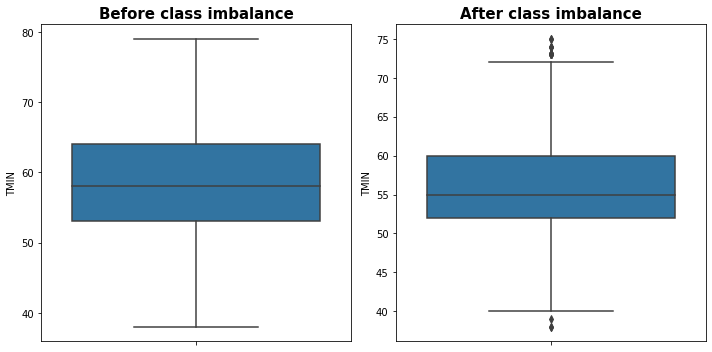

In [59]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'TMIN')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'TMIN')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

In [60]:
Q1 = np.quantile(x_res['TMIN'], 0.25)
Q3 = np.quantile(x_res['TMIN'], 0.75)
IQR = Q3 -Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('UPPER' ,x_res[x_res['TMIN'] > upper])
print('LOWER' ,x_res[x_res['TMIN'] < lower])

UPPER       AWND  TMAX  TMIN   WDF2   WDF5  WSF2  WSF5
579   1.79    93    74  270.0  280.0   8.9  12.1
580   1.79    92    74  280.0  270.0  12.1  17.0
612   0.67    85    73  270.0  270.0  10.1  17.0
919   1.12    98    75  260.0  270.0   8.1  15.0
920   1.12    96    74  270.0  280.0   8.1  13.0
921   1.12    91    73  280.0  270.0   8.9  14.1
952   1.79    93    73  270.0  270.0  10.1  15.0
953   2.46    90    73  280.0  270.0  12.1  21.9
1343  1.12    94    73  260.0  270.0  10.1  16.1
1344  2.24    93    73  270.0  270.0  10.1  15.0
1688  0.89    98    73  170.0  260.0   6.9  13.0
1689  1.57    95    73  130.0  130.0   8.1  12.1
1692  1.34    94    75  260.0  260.0   8.9  16.1
1693  1.79    94    73  260.0  260.0   8.9  15.0
1694  1.57    91    73  270.0  270.0   6.9  12.1
1695  1.57    96    73  270.0  260.0   8.9  15.0
1696  1.79    91    73  260.0  270.0   8.9  15.0
LOWER       AWND  TMAX  TMIN   WDF2   WDF5  WSF2  WSF5
1093  0.67    62    39  280.0  280.0   6.9  11.0
1096  1.

<p>
Remove lower and upper outliers 
<p/>

In [61]:
x_res = x_res[x_res['TMIN'] > lower]
x_res = x_res[x_res['TMIN'] < upper]

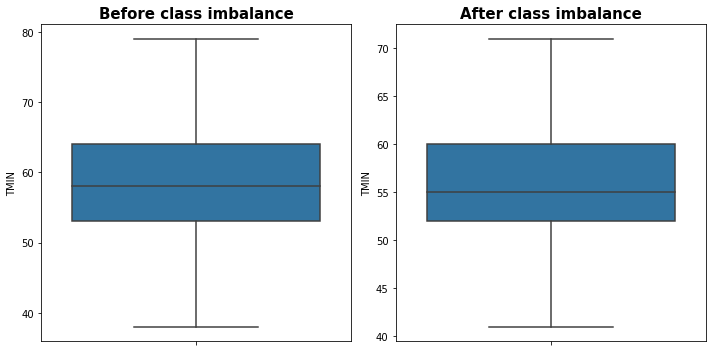

In [62]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'TMIN')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'TMIN')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

***Column WDF2 = Direction of fastest 2-minute wind (degrees)***

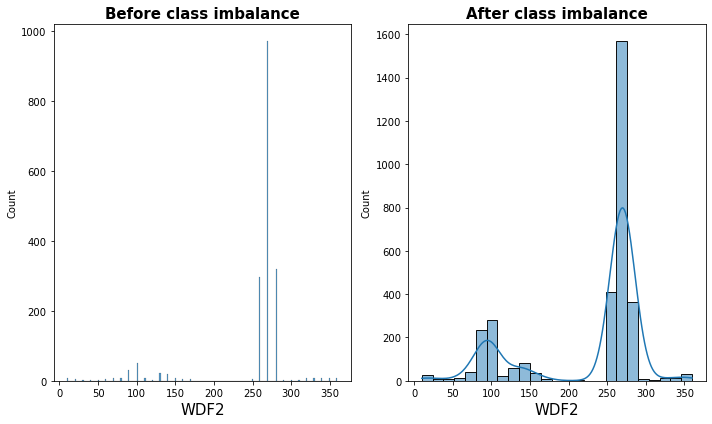

In [63]:
fig,ax = plt.subplots(1,2, figsize = (10,6))


# before class imbalance\
sns.histplot(data['WDF2'], ax = ax[0])
ax[0].set_title('Before class imbalance', fontweight = 'bold', size = 15)
ax[0].set_xlabel('WDF2',fontsize = 15)

sns.histplot(x_res['WDF2'], kde = True, ax = ax[1])
ax[1].set_title('After class imbalance', fontweight = 'bold',size =15)
ax[1].set_xlabel('WDF2',fontsize = 15)

plt.tight_layout() 
plt.show()



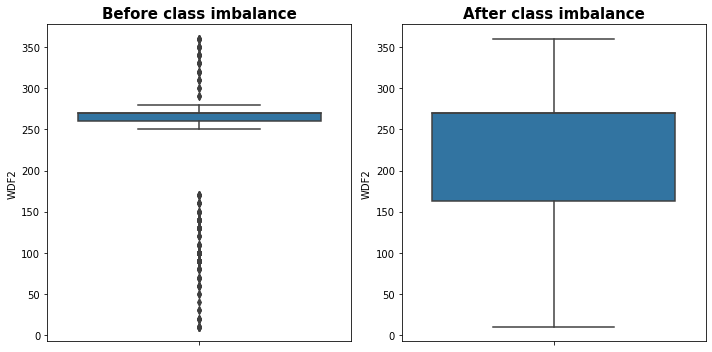

In [64]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'WDF2')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'WDF2')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

***Column WDF5 = Direction of fastest 5-minute wind (degrees)***

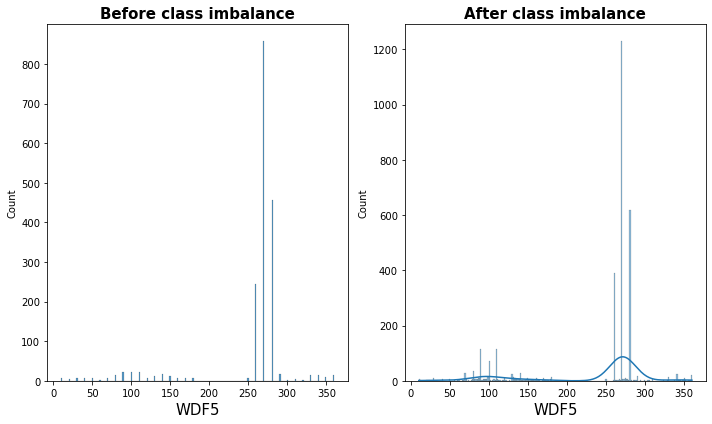

In [65]:
fig,ax = plt.subplots(1,2, figsize = (10,6))


# before class imbalance\
sns.histplot(data['WDF5'], ax = ax[0])
ax[0].set_title('Before class imbalance', fontweight = 'bold', size = 15)
ax[0].set_xlabel('WDF5',fontsize = 15)

sns.histplot(x_res['WDF5'], kde = True, ax = ax[1])
ax[1].set_title('After class imbalance', fontweight = 'bold',size =15)
ax[1].set_xlabel('WDF5',fontsize = 15)

plt.tight_layout() 
plt.show()



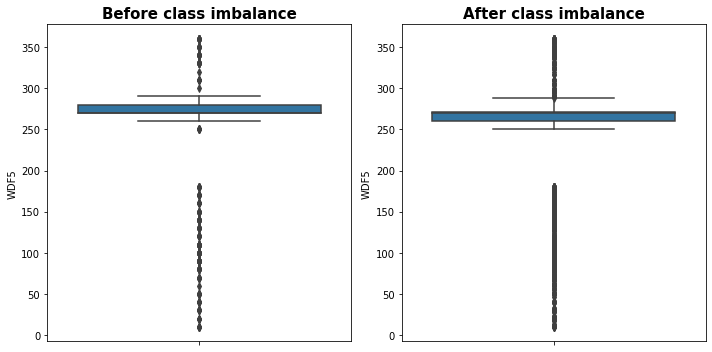

In [66]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'WDF5')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'WDF5')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

In [67]:
Q1 = np.quantile(x_res['WDF5'], 0.25)
Q3 = np.quantile(x_res['WDF5'], 0.75)
IQR = Q3 -Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('UPPER:- ' ,x_res[x_res['WDF5'] > upper])
print('LOWER:- ' ,x_res[x_res['WDF5'] < lower])

UPPER:-            AWND  TMAX  TMIN        WDF2        WDF5       WSF2       WSF5
5     2.910000    58    46   80.000000  290.000000  12.100000  17.000000
7     2.240000    62    44  280.000000  340.000000   8.100000  16.100000
22    1.120000    64    54  350.000000  360.000000   8.900000  15.000000
73    1.790000    70    58  280.000000  310.000000   8.900000  14.100000
81    5.590000    71    53  310.000000  310.000000  16.100000  25.900000
...        ...   ...   ...         ...         ...        ...        ...
3206  2.776628    61    48  350.000000  341.974143   9.136897  16.277673
3241  2.442928    62    50  350.000000  343.838389   9.360607  16.445455
3249  2.637344    60    47   38.381703  328.070584  11.545438  18.871372
3278  1.426468    69    55  301.525502  298.450430   8.346006  13.330029
3292  2.632629    62    51  330.306206  328.864827  11.478193  18.438910

[140 rows x 7 columns]
LOWER:-            AWND  TMAX  TMIN        WDF2   WDF5       WSF2       WSF5
0     2.460000

**Column WSF2 = Fastest 2-minute wind speed (tenths of meters per second)**

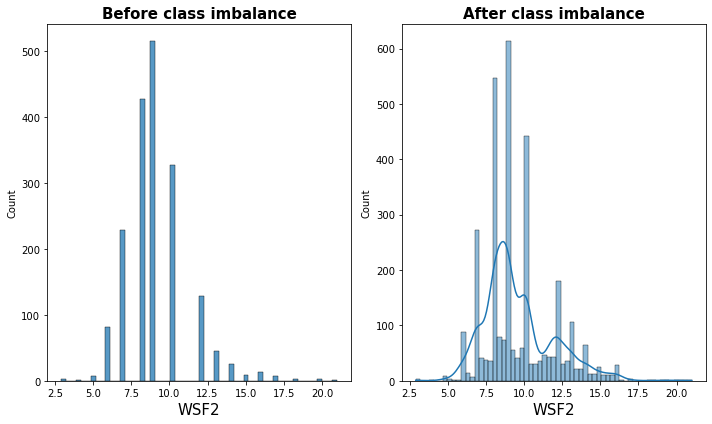

In [68]:
fig,ax = plt.subplots(1,2, figsize = (10,6))


# before class imbalance\
sns.histplot(data['WSF2'], ax = ax[0])
ax[0].set_title('Before class imbalance', fontweight = 'bold', size = 15)
ax[0].set_xlabel('WSF2',fontsize = 15)

sns.histplot(x_res['WSF2'], kde = True, ax = ax[1])
ax[1].set_title('After class imbalance', fontweight = 'bold',size =15)
ax[1].set_xlabel('WSF2',fontsize = 15)

plt.tight_layout() 
plt.show()


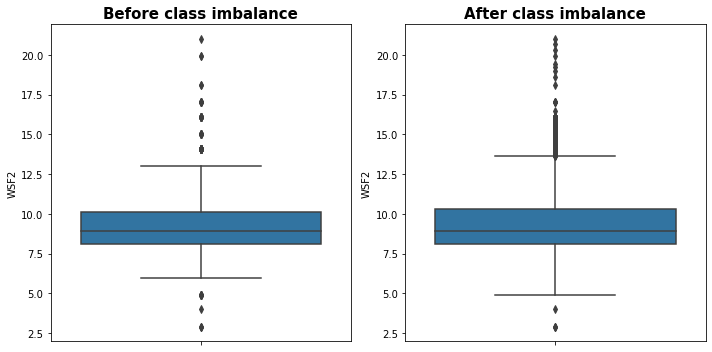

In [69]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'WSF2')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'WSF2')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

In [70]:
Q1 = np.quantile(x_res['WSF2'], 0.25)
Q3 = np.quantile(x_res['WSF2'], 0.75)
IQR = Q3 -Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(x_res[x_res['WSF2'] > upper])
print(x_res[x_res['WSF2'] < lower])

          AWND  TMAX  TMIN        WDF2        WDF5       WSF2       WSF5
30    4.470000    59    50  270.000000  280.000000  16.100000  32.000000
65    4.700000    67    54  270.000000  270.000000  16.100000  34.000000
66    3.360000    61    47  270.000000  260.000000  14.100000  25.900000
81    5.590000    71    53  310.000000  310.000000  16.100000  25.900000
88    3.130000    64    48  270.000000  260.000000  14.100000  25.900000
...        ...   ...   ...         ...         ...        ...        ...
3281  4.242562    69    57   82.753812   82.753812  14.201395  20.853552
3299  4.380589    59    52  140.000000  148.574059  15.244435  23.816653
3311  5.492384    57    50  100.000000   90.000000  14.576883  24.304747
3312  3.883310    66    54  270.000000  270.000000  14.969759  31.812438
3319  4.895492    63    52   90.275367  110.000000  16.014636  23.765070

[203 rows x 7 columns]
      AWND  TMAX  TMIN   WDF2   WDF5  WSF2  WSF5
514   0.89    73    60  280.0  270.0   2.9  14.1
74

In [71]:
x_res[x_res['WSF2'] > 16.1]

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
419,5.140000,62,49,270.000000,280.000000,17.000000,27.100000
836,3.130000,65,52,260.000000,270.000000,17.000000,32.000000
1143,3.360000,58,44,270.000000,260.000000,17.000000,30.000000
1194,4.700000,80,62,340.000000,360.000000,18.100000,34.000000
1455,4.700000,56,47,80.000000,80.000000,21.000000,32.000000
1494,5.820000,63,48,340.000000,330.000000,19.900000,34.000000
1867,5.912336,56,49,92.063042,86.031521,18.587392,29.587392
2070,4.880051,56,47,80.000000,81.607599,19.247717,29.267082
2187,5.387130,64,56,82.975350,80.000000,16.457922,24.905104
2235,5.701373,56,48,89.963914,84.981957,19.007217,30.007217


<P> 
Remove the lower outliers and upper outlier after 17
<p/>

In [72]:
x_res = x_res[x_res['WSF2'] < 16.1]

In [73]:
x_res = x_res[x_res['WSF2'] > lower]

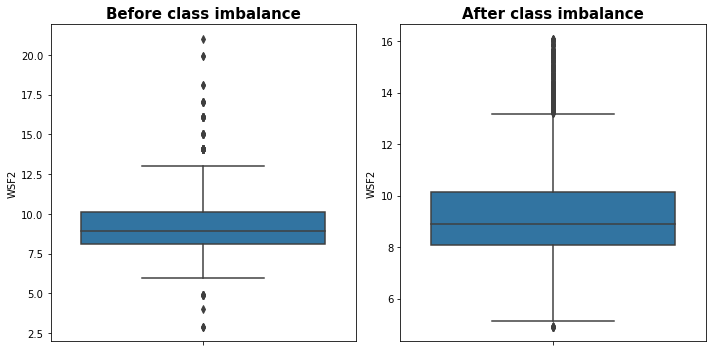

In [74]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'WSF2')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'WSF2')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

**WSF5= Fastest 5-minute wind speed (tenths of meters per second)**

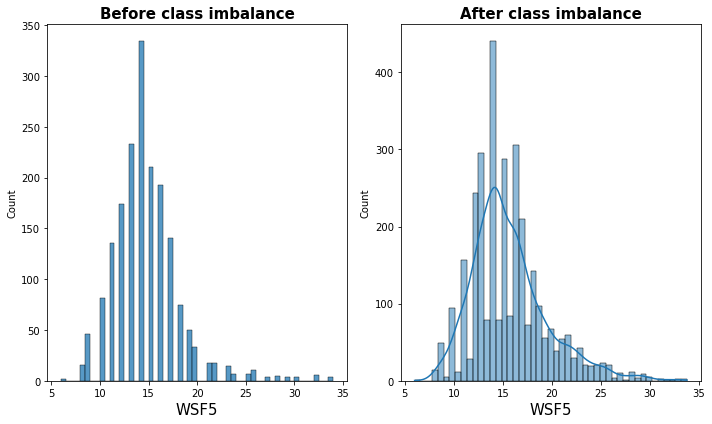

In [75]:
fig,ax = plt.subplots(1,2, figsize = (10,6))


# before class imbalance\
sns.histplot(data['WSF5'], ax = ax[0])
ax[0].set_title('Before class imbalance', fontweight = 'bold', size = 15)
ax[0].set_xlabel('WSF5',fontsize = 15)

sns.histplot(x_res['WSF5'], kde = True, ax = ax[1])
ax[1].set_title('After class imbalance', fontweight = 'bold',size =15)
ax[1].set_xlabel('WSF5',fontsize = 15)

plt.tight_layout() 
plt.show()




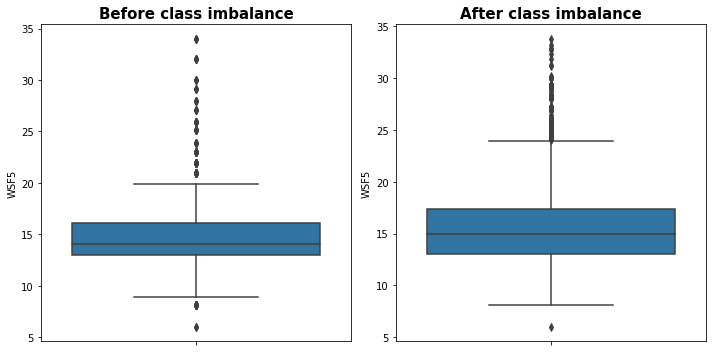

In [76]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'WSF5')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'WSF5')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

In [77]:
Q1 = np.quantile(x_res['WSF5'], 0.25)
Q3 = np.quantile(x_res['WSF5'], 0.75)
IQR = Q3 -Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(x_res[x_res['WSF5'] > upper])
print(x_res[x_res['WSF5'] < lower])

          AWND  TMAX  TMIN      WDF2   WDF5       WSF2       WSF5
66    3.360000    61    47  270.0000  260.0  14.100000  25.900000
87    2.460000    66    54  270.0000  270.0  13.000000  28.000000
88    3.130000    64    48  270.0000  260.0  14.100000  25.900000
112   2.680000    73    60  270.0000  260.0  13.000000  25.100000
115   4.250000    69    55  320.0000  270.0  15.000000  28.000000
...        ...   ...   ...       ...    ...        ...        ...
3253  4.448160    63    52  136.3808  140.0  14.447680  25.533440
3258  3.603493    65    54  270.0000  270.0  14.874853  29.038155
3280  2.755218    67    54  270.0000  270.0  14.705670  28.053493
3311  5.492384    57    50  100.0000   90.0  14.576883  24.304747
3312  3.883310    66    54  270.0000  270.0  14.969759  31.812438

[121 rows x 7 columns]
     AWND  TMAX  TMIN  WDF2  WDF5  WSF2  WSF5
368   0.0    60    48  50.0  50.0   4.9   6.0


In [78]:
x_res[x_res['WSF5'] > 27]

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
87,2.460000,66,54,270.000000,270.0,13.000000,28.000000
115,4.250000,69,55,320.000000,270.0,15.000000,28.000000
446,2.680000,69,55,270.000000,270.0,15.000000,29.100000
480,5.590000,77,60,290.000000,290.0,14.100000,27.100000
1116,5.370000,63,53,340.000000,350.0,14.100000,29.100000
1773,3.800000,62,49,260.000000,260.0,15.000000,30.000000
1831,2.464943,66,54,270.000000,270.0,13.044939,28.024716
1929,2.524830,66,54,270.000000,270.0,13.089719,28.173651
1963,4.381575,61,50,270.000000,280.0,14.854014,28.382622
2018,4.400084,67,57,270.000000,270.0,15.652365,28.433277


<P>
Remove the lower outliers and upper outlier after 27
<p/>


In [79]:
x_res = x_res[x_res['WSF5'] < 27]

In [80]:
x_res = x_res[x_res['WSF5'] > lower]

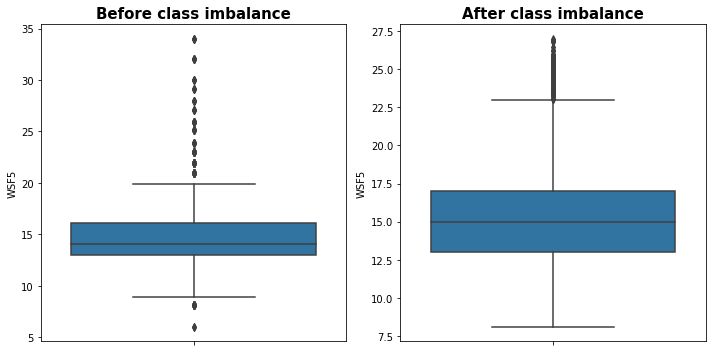

In [81]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = ax[0], data = data, y = 'WSF5')
ax[0].set_title('Before class imbalance', fontweight ='bold', size = 15)

sns.boxplot(ax = ax[1], data = x_res, y = 'WSF5')
ax[1].set_title('After class imbalance', fontweight ='bold', size = 15)

plt.tight_layout() 
plt.show()

**Column PRCP = Precipitation (tenths of mm)**

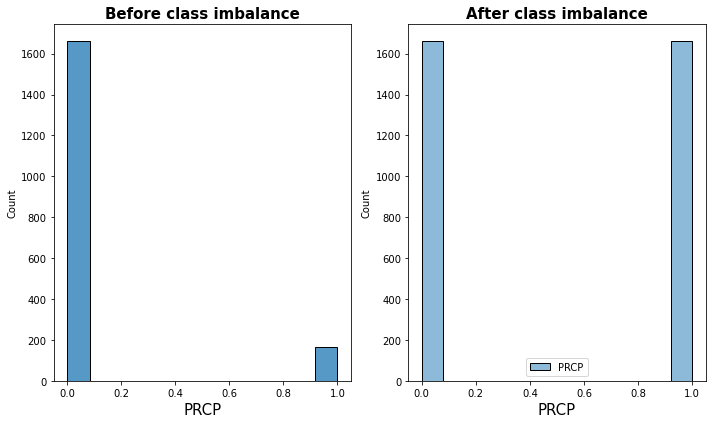

In [82]:
fig,ax = plt.subplots(1,2, figsize = (10,6))


# before class imbalance\
sns.histplot(data['PRCP'], ax = ax[0])
ax[0].set_title('Before class imbalance', fontweight = 'bold', size = 15)
ax[0].set_xlabel('PRCP',fontsize = 15)

sns.histplot(y_res, ax = ax[1])
ax[1].set_title('After class imbalance', fontweight = 'bold',size =15)
ax[1].set_xlabel('PRCP',fontsize = 15)

plt.tight_layout() 
plt.show()


### Relationship analysis by correlation

In [135]:
data.corr()

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
AWND,1.000000,0.296275,-0.210241,0.044547,-0.121647,-0.075251,0.684451,0.716180
PRCP,0.296275,1.000000,-0.399819,-0.181494,-0.327911,-0.289741,0.198397,0.227879
TMAX,-0.210241,-0.399819,1.000000,0.728544,0.249888,0.221561,-0.106349,-0.154401
TMIN,0.044547,-0.181494,0.728544,1.000000,0.221233,0.197057,0.068868,0.052455
WDF2,-0.121647,-0.327911,0.249888,0.221233,1.000000,0.742144,0.027084,0.074085
WDF5,-0.075251,-0.289741,0.221561,0.197057,0.742144,1.000000,0.078202,0.119611
WSF2,0.684451,0.198397,-0.106349,0.068868,0.027084,0.078202,1.000000,0.900583
WSF5,0.716180,0.227879,-0.154401,0.052455,0.074085,0.119611,0.900583,1.000000


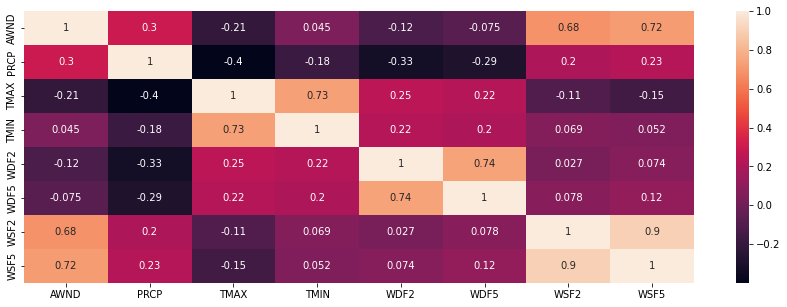

In [143]:
plt.figure(figsize = (15,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [142]:
data.corr()['PRCP']

AWND    0.296275
PRCP    1.000000
TMAX   -0.399819
TMIN   -0.181494
WDF2   -0.327911
WDF5   -0.289741
WSF2    0.198397
WSF5    0.227879
Name: PRCP, dtype: float64

### Standardizing data and feature selection


Define Hypothesis by Chi-Square Test for Feature Selection

  * Null Hypothesis (H0): Two variables are independent.

  * Alternate Hypothesis (H1): Two variables are not independent.

In [88]:
from sklearn.feature_selection import SelectKBest, chi2

In [89]:
print(x_res.shape)
print(y_res.shape)


(3150, 7)
(3320, 1)


In [90]:
# To manege the index
print(x_res.index)
y_res = y_res.iloc[x_res.index]



Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3309, 3310, 3311, 3313, 3314, 3315, 3316, 3317, 3318, 3319],
           dtype='int64', length=3150)


In [91]:
print(x_res.shape)
print(y_res.shape)

(3150, 7)
(3150, 1)


In [92]:
x_res.reset_index(inplace = True)

In [93]:
x_res.drop(['index'], axis = 1, inplace = True)

In [289]:
x_res.head()

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2
0,0.431610,-0.778897,-2.120602,-2.832250,-2.695322,-0.659113
1,0.011048,-0.668407,-1.464214,0.550446,-2.695322,-1.692099
2,-1.241291,-0.999875,-1.956505,-1.010798,-1.104717,0.324683
3,-0.615121,-0.226450,-0.151438,0.550446,0.618438,-0.659113
4,0.431610,-1.331343,-1.136020,-1.140902,-1.237267,0.324683


In [95]:
x_new = SelectKBest(chi2, k="all").fit_transform(x_res, y_res)

In [96]:
chi_scores = chi2(x_new,y_res)


In [98]:
chi_scores 

(array([  317.95619978,  1758.73407121,   327.32668792, 14190.41700399,
        10648.25369209,   114.82936629,   286.38297626]),
 array([4.03728650e-71, 0.00000000e+00, 3.67320676e-73, 0.00000000e+00,
        0.00000000e+00, 8.57690166e-27, 3.05274020e-64]))

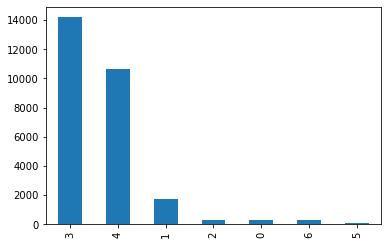

In [99]:
# Higher the chi-value, higher the importance

chi_values = pd.Series(chi_scores[0])
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot.bar()

plt.show()

In [100]:
chi_values[5]

114.82936628613491

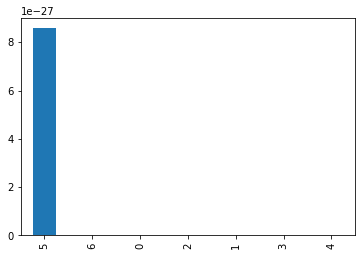

In [101]:
# Higher the p-value(p-value > 0.5), lower the importance

p_values = pd.Series(chi_scores[1])  #, index = x.columns
p_values.sort_values(ascending = False, inplace = True)
p_values.plot.bar()

plt.show()

**COMMENT :-** So we get low chi-value of WSF5 and Higher the P-value of WSF2 so it's less important it's better to remove it.

In [102]:
#data.drop("WSF5", inplace = True, axis = 1)

In [103]:
x_res.drop(['WSF5'], inplace = True, axis = 1)

In [104]:
x_res.columns

Index(['AWND', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2'], dtype='object')

In [105]:
data.columns

Index(['AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'], dtype='object')

### Data Normalization

**Z-score method**

In [106]:
for i in data.columns:
    data[i] = (data[i] - data[i].mean())/ data[i].std()


In [107]:
for i in x_res.columns:
    x_res[i] = (x_res[i] - x_res[i].mean())/ x_res[i].std()


<AxesSubplot:>

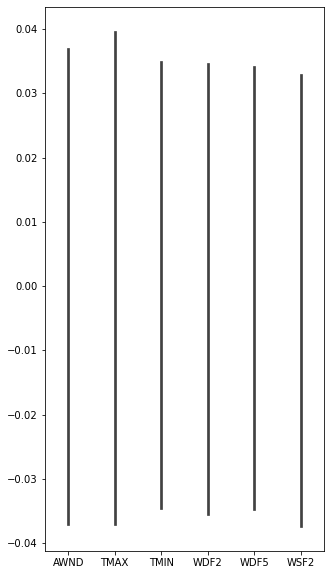

In [110]:
plt.figure(figsize = (5,10))
sns.barplot(data = x_res)

### ||------------------------------------- TRAINING MODEL USING DIFFERENT TECHNIQUES --------------------------------------||

In [111]:
# data2 = x_res
# data2["PRCP"] =y_res

In [112]:
x_res.isnull().sum()


AWND    0
TMAX    0
TMIN    0
WDF2    0
WDF5    0
WSF2    0
dtype: int64

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, random_state = 104, test_size = 0.25, shuffle = True)

### 1. Logistic Regression Classifier

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
clf = LogisticRegression(solver= 'liblinear',random_state = 0)

In [117]:
clf.fit(x_train,y_train)

C:\Users\verma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [118]:
predicted = clf.predict(x_test)

In [119]:
print('Accuracy of train data: ', clf.score(x_train, y_train))
print('Accuracy of test data: ', clf.score(x_test,y_test))
print('\nOverall 87% variation is explained on both training and test data by our fitted model rest 13% variation is unexplained by our model.')

Accuracy of train data:  0.8797629127857748
Accuracy of test data:  0.8743654822335025

Overall 87% variation is explained on both training and test data by our fitted model rest 13% variation is unexplained by our model.


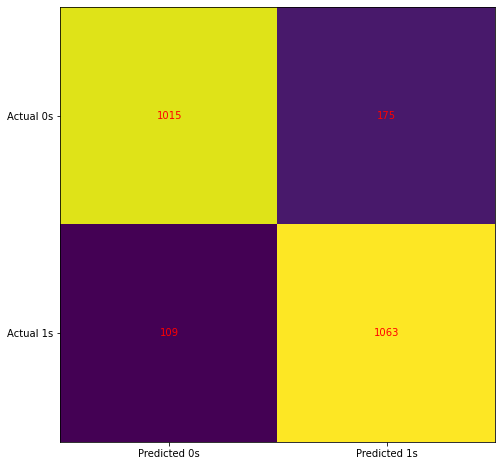

In [124]:
# to see visuale confusion matrix of x_train and y_train

cm = confusion_matrix(y_train, clf.predict(x_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [125]:
print('report:', classification_report(clf.predict(x_train), y_train), sep='\n')

report:
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1124
         1.0       0.91      0.86      0.88      1238

    accuracy                           0.88      2362
   macro avg       0.88      0.88      0.88      2362
weighted avg       0.88      0.88      0.88      2362



In [126]:
confusion_matrix(y_test, predicted)

array([[327,  61],
       [ 38, 362]], dtype=int64)

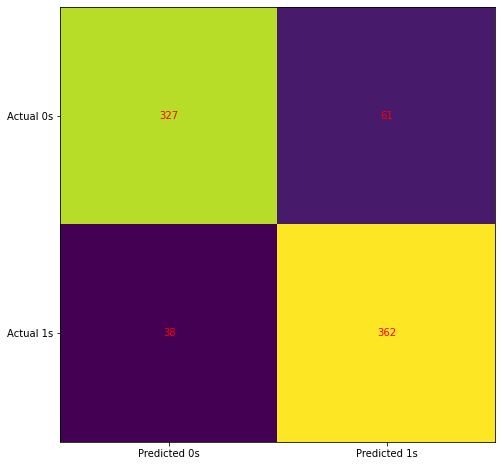

In [127]:
# to see visuale the confusion matrix of y_test and predicted values

cm = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [128]:
print('report:', classification_report(y_test, predicted), sep='\n')

report:
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       388
         1.0       0.86      0.91      0.88       400

    accuracy                           0.87       788
   macro avg       0.88      0.87      0.87       788
weighted avg       0.88      0.87      0.87       788



### 2. K-NN Classifier

In [240]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

C:\Users\verma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [251]:
print('Model accuracy is :', knn.score(x_test,y_test))

Model accuracy is : 0.9302030456852792


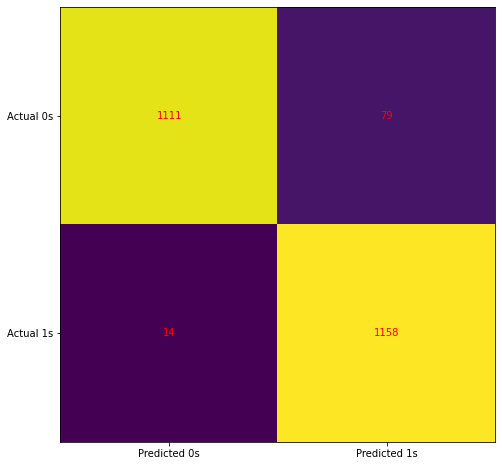

In [245]:
# to see visuale confusion matrix of x_train and y_train

cm = confusion_matrix(y_train, knn.predict(x_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [247]:
print('report:', classification_report(knn.predict(x_train), y_train), sep='\n')

report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1125
         1.0       0.99      0.94      0.96      1237

    accuracy                           0.96      2362
   macro avg       0.96      0.96      0.96      2362
weighted avg       0.96      0.96      0.96      2362



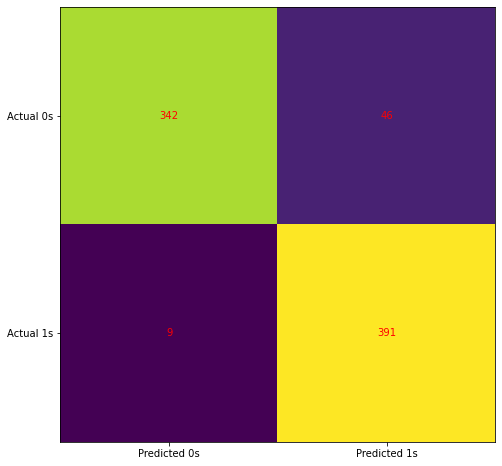

In [244]:
# to see visuale the confusion matrix of y_test and predicted values

cm = confusion_matrix(y_test, knn.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

**COMMENT :-** In K-NN Classifier accuracy increases

In [283]:
print('report:', classification_report(knn.predict(x_test), y_test), sep='\n')

report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93       351
         1.0       0.98      0.89      0.93       437

    accuracy                           0.93       788
   macro avg       0.93      0.93      0.93       788
weighted avg       0.93      0.93      0.93       788



In [285]:
print('Accuracy of train data: ', knn.score(x_train, y_train))
print('Accuracy of test data: ', knn.score(x_test,y_test))


Accuracy of train data:  0.9606265876375952
Accuracy of test data:  0.9302030456852792


### 3. Support Vector Machine(SVM)

In [253]:
from sklearn.svm import SVC

In [273]:
svc = SVC(C= 10)

In [274]:
svc.fit(x_train, y_train)

C:\Users\verma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10)

In [275]:
svc.score(x_test, y_test)

0.9200507614213198

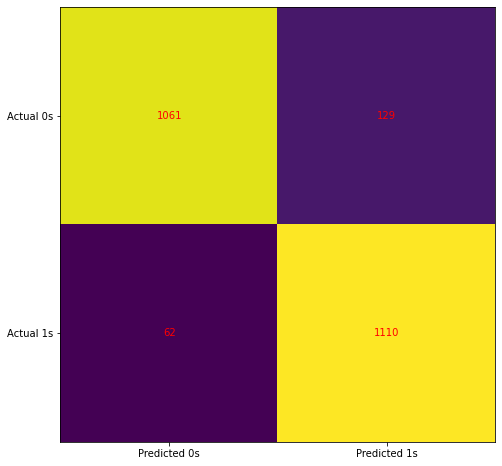

In [276]:
# to see visuale confusion matrix of x_train and y_train

cm = confusion_matrix(y_train, svc.predict(x_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [279]:
print('report:', classification_report(svc.predict(x_train), y_train), sep='\n')

report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      1123
         1.0       0.95      0.90      0.92      1239

    accuracy                           0.92      2362
   macro avg       0.92      0.92      0.92      2362
weighted avg       0.92      0.92      0.92      2362



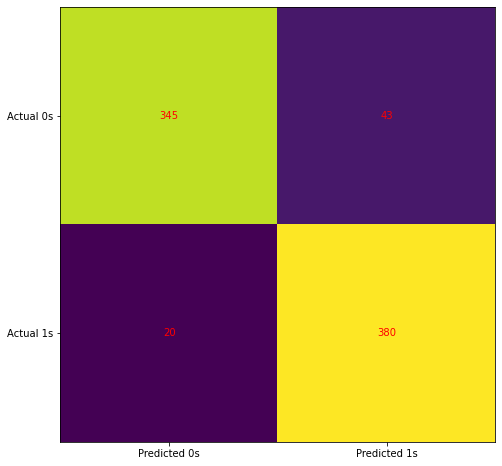

In [280]:
# to see visuale the confusion matrix of y_test and predicted values

cm = confusion_matrix(y_test, svc.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [282]:
print('report:', classification_report(svc.predict(x_test), y_test), sep='\n')

report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       365
         1.0       0.95      0.90      0.92       423

    accuracy                           0.92       788
   macro avg       0.92      0.92      0.92       788
weighted avg       0.92      0.92      0.92       788



In [287]:
print('Accuracy of train data: ', svc.score(x_train, y_train))
print('Accuracy of test data: ', svc.score(x_test,y_test))


Accuracy of train data:  0.9191363251481796
Accuracy of test data:  0.9200507614213198


**CONCLUSION :-** 
   * For our model prediction K-NN classifier give less False Positive and less False Negative value which increase model Accuracy, Sensitivity and Precision.
   * K-NN classifier good model compare to logistic regression and support vector machine.